# **Data Description**
**The Street View House Numbers (SVHN) Dataset**

SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

****

# Import the necessary libraries

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

%matplotlib inline

from numpy.random import seed

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

### Import Drive from Google Colab

In [2]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


### Access datafile in read mode

In [4]:
seed(42)
h5f = h5py.File('/content/drive/My Drive/Projects/ANN Classification/SVHN_single_grey.h5', 'r');


In [5]:
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

### Read data into variables

In [6]:
#Load the training, testing, and validation data
X_train = h5f['X_train'][:]
X_test  = h5f['X_test'][:]
X_val   = h5f['X_val'][:]
y_train = h5f['y_train'][:]
y_test  = h5f['y_test'][:]
y_val   = h5f['y_val'][:]

h5f.close()

### Printing the shape and data type of training, testing, and validation data

In [7]:
print(f"Training feature shape {X_train.shape}\n")
print(f"Training target shape {y_train.shape}\n")
print(f"Validation feature shape {X_val.shape}\n")
print(f"Validation target shape {y_val.shape}\n")
print(f"Testing feature shape {X_test.shape}\n")
print(f"Testing target shape {y_test.shape}\n")

Training feature shape (42000, 32, 32)

Training target shape (42000,)

Validation feature shape (60000, 32, 32)

Validation target shape (60000,)

Testing feature shape (18000, 32, 32)

Testing target shape (18000,)



### Visualizing some images and their labels in the train dataset

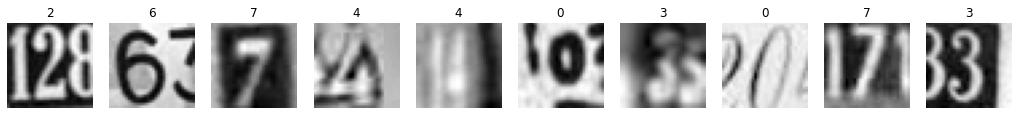

In [8]:
plt.figure(figsize=(18, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

### Visualizing the first 10 images and their labels in the validation dataset 

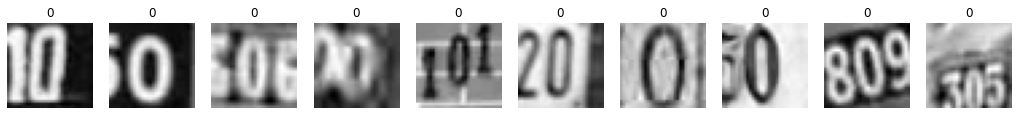

In [9]:
plt.figure(figsize=(18, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_val[i],cmap='gray')
    plt.title(y_val[i])
    plt.axis('off')
plt.show()

### Visualizing the first 10 images and their labels in the test dataset 

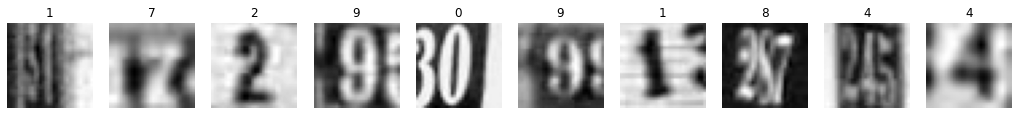

In [10]:
plt.figure(figsize=(18, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i],cmap='gray')
    plt.title(y_test[i])
    plt.axis('off')
plt.show()

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

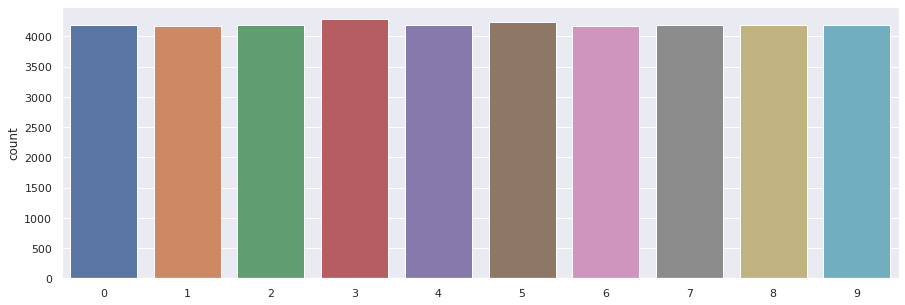

In [12]:
import seaborn as sns
plt.figure(figsize=(15, 5))
sns.set(style="darkgrid")
ax = sns.countplot(x=y_train)

# Data Pre-processing

### Reshape the features from 32×32 into a single dimensional array of 1024 features in total.



In [13]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test  = X_test.reshape((X_test.shape[0], -1))
X_val   = X_val.reshape((X_val.shape[0], -1))

In [14]:
print(f"Training feature shape {X_train.shape}\n")
print(f"Validation feature shape {X_val.shape}\n")
print(f"Test feature shape {X_test.shape}\n")

Training feature shape (42000, 1024)

Validation feature shape (60000, 1024)

Test feature shape (18000, 1024)



### Checking the proportion of each class in the target variable to ensure there is no imbalance in the ground truth values.

In [15]:
for i in range(0,10):
  print("Label: {0} | Value % = {1}".format( i, (y_train[y_train == i].size / y_train.size)*100) )
  

Label: 0 | Value % = 9.966666666666667
Label: 1 | Value % = 9.933333333333334
Label: 2 | Value % = 9.992857142857142
Label: 3 | Value % = 10.192857142857143
Label: 4 | Value % = 9.971428571428572
Label: 5 | Value % = 10.076190476190476
Label: 6 | Value % = 9.923809523809524
Label: 7 | Value % = 9.980952380952381
Label: 8 | Value % = 9.971428571428572
Label: 9 | Value % = 9.99047619047619


It looks good.

### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train, y_val and y_test
- number of classes: 10
- we are doing this to use categorical_crossentropy as loss

In [16]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)
y_val   = to_categorical(y_val, num_classes=10)

In [17]:
print(f"Y training shape: {y_train.shape}\n")
print(f"Y validation shape: {y_val.shape}\n")
print(f"Y testing shape: {y_test.shape}\n")

Y training shape: (42000, 10)

Y validation shape: (60000, 10)

Y testing shape: (18000, 10)



In [18]:
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


# Implementing basic NN model

In [19]:
## Initialize the Artificial Neural Network Classifier
model = Sequential()

In [20]:
# Input layer
# adding input layer with activation function relu
model.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
model.add(Activation('relu'))

# adding first hidden layer with activation function relu
model.add(Dense(256, kernel_initializer="he_normal"))
model.add(Activation('relu'))

# adding second hidden layer with activation function relu
model.add(Dense(128, kernel_initializer="he_normal"))
model.add(Activation('relu'))

# adding third hidden layer with activation function relu
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('relu'))

# adding fourth hidden layer with activation function relu
model.add(Dense(32, kernel_initializer="he_normal"))
model.add(Activation('relu'))

# Output Layer
# Adding output layer which is of 10 nodes (digits)
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

### Using adam optimizer and Categorical Crossentropy as loss function and Accuracy as the metric to monitor

In [21]:
# compiling the ANN classifier
adam = optimizers.Adam(learning_rate = 0.01)
Lambda = 1e3
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
# Fitting the ANN to the Training data
history = model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 [==============================] - 2s 11ms/step - loss: 121.3949 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
210/210 [==============================] - 2s 10ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
210/210 [==============================] - 2s 10ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
210/210 [==============================] - 2s 10ms/step - loss: 2.3029 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
210/210 [==============================] - 2s 10ms/step - loss: 2.3029 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
210/210 [==============================] - 2s 10ms/step - loss: 2.3030 - accuracy: 0.0977 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 7/10
210/210 [==============================] - 2s 10ms/step - loss: 2.3030 - accuracy: 0.0997 - val_loss: 2.3028 - val_accuracy: 0.10

# Batch Normalization

In [23]:
def mlp_model():
    model = Sequential()
    
    # Input layer
    # adding input layer with activation function relu
    model.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
    model.add(BatchNormalization()) # Adding BatchNormalization Layer
    model.add(Activation('relu'))

    # adding first hidden layer with activation function relu
    model.add(Dense(256, kernel_initializer="he_normal"))
    model.add(BatchNormalization()) # Adding BatchNormalization Layer
    model.add(Activation('relu'))

    # adding second hidden layer with activation function relu
    model.add(Dense(128, kernel_initializer="he_normal"))
    model.add(BatchNormalization()) # Adding BatchNormalization Layer
    model.add(Activation('relu'))

    # adding third hidden layer with activation function relu
    model.add(Dense(64, kernel_initializer="he_normal"))
    model.add(BatchNormalization()) # Adding BatchNormalization Layer
    model.add(Activation('relu'))

    # adding fourth hidden layer with activation function relu
    model.add(Dense(32, kernel_initializer="he_normal"))
    model.add(BatchNormalization()) # Adding BatchNormalization Layer
    model.add(Activation('relu'))

    # Output Layer
    # Adding output layer which is of 10 nodes (digits)
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    return model

In [24]:
model = mlp_model()

model.summary()

#Setting the learning rate in sgd
adam = optimizers.Adam(learning_rate = 0.01)

# compiling the ANN classifier
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training data
history = model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

In [25]:
# Model evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: %.2f%%" % (scores[1]*100))

Test Accuracy: 78.69%


#### Predicting the digits using NN classifier on test data

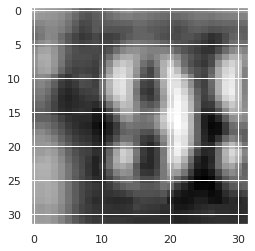

In [26]:
#Showing the image
plt.imshow(X_test[5].reshape(32,32),cmap='gray')

In [27]:
y_pred_class = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [28]:
y_pred_class[5]

9

# Classification accuracy metrics

In [29]:
y_test = np.argmax(y_test, axis=-1)

In [30]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7869444444444444


In [31]:
cm = metrics.confusion_matrix(y_test, y_pred_class)
cm

array([[1578,   31,    5,   30,   19,   13,   33,   24,   44,   37],
       [ 108, 1356,   14,   78,   72,   15,   17,   68,   54,   46],
       [  81,   21, 1336,   66,   44,   12,   13,   56,   68,  106],
       [  42,   36,   19, 1342,   33,   69,   21,   28,   74,   55],
       [  34,   33,   16,   28, 1561,   18,   46,   19,   37,   20],
       [  27,   17,    7,  138,   24, 1271,   94,   20,  103,   67],
       [  68,   12,    6,   30,   49,   50, 1462,   21,  116,   18],
       [  69,   53,   31,   44,   15,   13,   24, 1486,   26,   47],
       [  71,   27,   14,   61,   35,   34,   65,   15, 1418,   72],
       [ 117,   19,   15,   50,   39,   64,   27,   31,   87, 1355]])

In [32]:
from sklearn.metrics import classification_report

In [33]:
print (classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79      1814
           1       0.84      0.74      0.79      1828
           2       0.91      0.74      0.82      1803
           3       0.72      0.78      0.75      1719
           4       0.83      0.86      0.84      1812
           5       0.82      0.72      0.76      1768
           6       0.81      0.80      0.80      1832
           7       0.84      0.82      0.83      1808
           8       0.70      0.78      0.74      1812
           9       0.74      0.75      0.75      1804

    accuracy                           0.79     18000
   macro avg       0.79      0.79      0.79     18000
weighted avg       0.79      0.79      0.79     18000



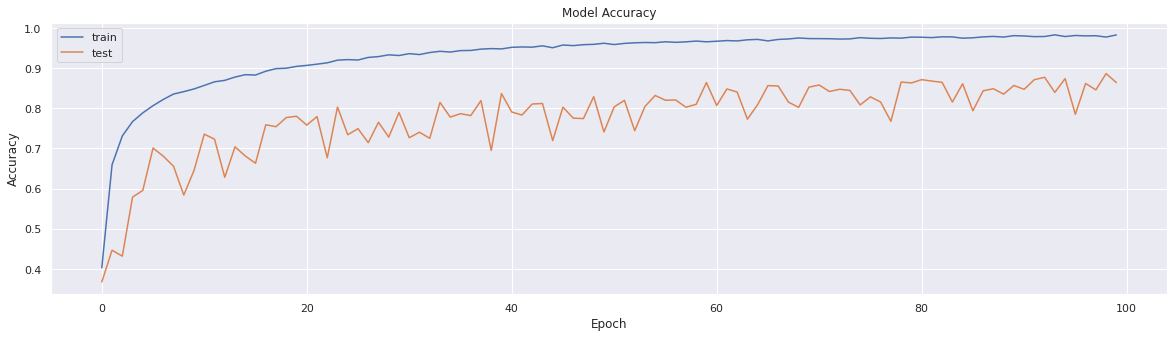

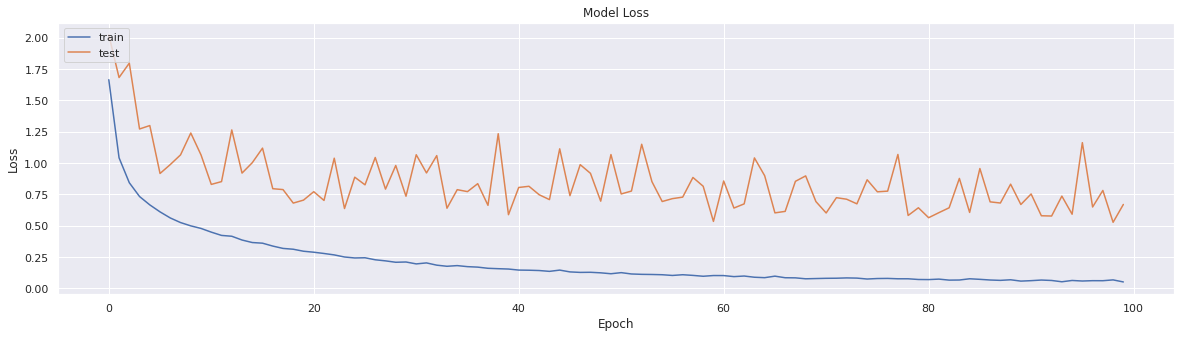

In [34]:
# summarize history for accuracy
plt.figure(figsize=(20, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(20, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()